# CIRCUITO RLC

Código feito pelo aluno Vinícius dos Passos de Souza para disciplina de Laboratório de Física II


# Igualar Voltagens

Supondo que pelo nosso sistema temos corrente $\boxed{I(t) = I_0 \cos{\omega t}}$ e medimos a voltagem no capacitor e no indutor, posso primeiro olhar pro capacitor e dizer que

$V_C = \frac{Q}{C} = \frac{1}{C}\int I dt$

$V_C = \frac{I_0}{C}\int \cos{\omega t} dt$

$\boxed{V_C = I_0\frac{1}{\omega C}\sin{\omega t} }$.

Olhando para o Indutor, posso dizer que como $V_L = -L\frac{dI}{dt}$

$\boxed{V_L = L\omega I_0 \sin{\omega t}}$.

Assim, caso consiga achar situação em que potenciais são iguais($V_C=V_L$), posso igualar equações e assim dizer que

$I_0 \frac{1}{\omega C}\sin{\omega t} = I_0 L \omega \sin{\omega t}$

$\boxed{\omega^2 = \frac{1}{LC}}$

Então podemos dizer que caso consigamos igualar potenciais podemos achar essa frequência, a baixo será apresentada a frequência e exemplos do que vimos

In [1]:
import numpy as np
#ET 2082C
R = 0 #ohms
eR=0
L = 22.5*10**(-3) #sla que unidade usa
eL = 0.025*L + 30*0.1*10**(-3)
C = 1.633*10**(-6) #Faraday
eC = C*0.025+20*0.001*10**(-6)
#frequencia do sistema
w =np.sqrt(1/(L*C))
ew = np.sqrt( (eL/(2*C**(1/2)*L**(3/2)))**2 + (eC/(2*C**(3/2)*L**(1/2)))**2)

print(f'Frequência do sistema que deve ser colocada {round(w,-2)}({round(ew,-2)}) rad/s')

print(f'Mas como aparelho usa outra unidade, seria {round(w/(2*np.pi),-1)} ({round(ew/(2*np.pi),-1)}) Hz')

Frequência do sistema que deve ser colocada 5200.0(400.0) rad/s
Mas como aparelho usa outra unidade, seria 830.0 (70.0) Hz


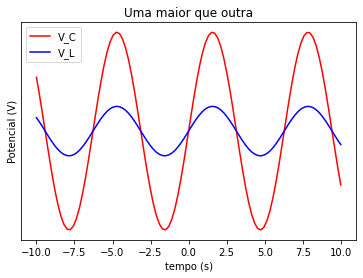

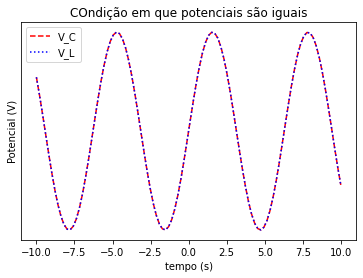

In [2]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(-10,10,100)

plt.plot(x,6*2*np.sin(x),'-',color='red',label='V_C')
plt.plot(x,6/2*np.sin(x),'-',color='blue',label='V_L')
plt.title('Uma maior que outra')
plt.yticks([])
plt.legend()
plt.xlabel('tempo (s)')
plt.ylabel('Potencial (V)')
plt.show()

plt.plot(x,6*np.sin(x),'--',color='red',label='V_C')
plt.plot(x,6*np.sin(x),':',color='blue',label='V_L')
plt.title('COndição em que potenciais são iguais')
plt.yticks([])
plt.legend()
plt.xlabel('tempo (s)')
plt.ylabel('Potencial (V)')
plt.show()

Para achar a ressonância do circuito devemos medir potêncial no INDUTOR e CAPACITOR ao mesmo tempo e ver em que momento os potênciais se cruzam.

# Extremizar Voltagens

Na situação em que medimos a voltagem na Resistencia e no conjunto de Capacitor e Indutor, podemos ao supor que corrente é $I = I_0 \cos{\omega t}$ podemos calcular seus potências, sendo o da resistência

$V_R = R I \implies \boxed{V_R = RI_0\cos{\omega t}}$.

Para outro conjunto teremos $V_{LC} = \frac{Q}{C}-L\frac{dI}{dt}$, assim

$V_{LC} = \frac{I_0}{\omega C}\sin{\omega t} +L\omega I_0\sin{\omega t}$

$\boxed{V_{LC} = I_0 \sin{\omega t} \left [ \frac{1}{C}\frac{1}{\omega} + L \omega \right ]}$.

Assim, nesse caso esperamos que ondas sejam opostas e que assim ao aumentar uma diminua a outra, a baixo estão dados experimentais para mostrar isso.

In [3]:
import pandas as pd
#importar dados
data = pd.read_excel('Circuito-RLC.xlsx',sheet_name='DADOS')

#dados ao extremizar potencial
F = data['W (Hz)'].values
V_R = data['V_R'].values
V_CL = data['V_CL (V) '].values
eV_CL =data['eV_LC (V)'].values 

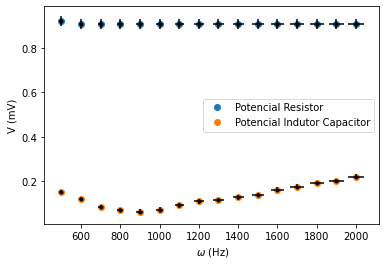

In [4]:
from matplotlib import pyplot as plt


plt.plot(F, V_R,'o',label='Potencial Resistor')
plt.errorbar(F,V_R,yerr=V_R*0.025,xerr=F*0.02,fmt='.k')
plt.plot(F,V_CL,'o',label='Potencial Indutor Capacitor')
plt.errorbar(F,V_CL,yerr=eV_CL,xerr=F*0.02,fmt='.k')
plt.xlabel(r' $\omega$ (Hz)')
plt.ylabel(r'V (mV)')
plt.legend()
plt.show()

Vemos mais ou menos o que esperamos, mas como a partir disso chegamos na frequência de ressonancia? Bom, podemos olhar para o potencial do conjunto capacitor e indutor e ver qual frequência o extremiza, ou seja $\frac{d V_{LC}}{d \omega} = 0$, caso só leve em conta picos, ou seja pontos em que $\sin{\omega t} = 1$

$I_0 \left [ \frac{-1}{C}\frac{1}{\omega^2} + L \right ] = 0$

$\boxed{\omega^2 = \frac{1}{LC}}$.

Então, se conseguir descrever o potencial do conjunto LC nos picos por meio de funções como seria o potencial $V_{LC} = I_0 \left [ \frac{1}{C}\frac{1}{\omega} + L \omega \right ]$, ou seja ,

$V = B\omega + A\frac{1}{\omega}+C$, sendo A,B e C constantes.

Podemos achar potêncial ao maximizar essa curva encontrada, que nos fornece

$\frac{dY}{d\omega} = 0 \implies B - A\frac{1}{\omega^2} = 0$

$\boxed{\omega^2 = \frac{A}{B}}$

Na equação que tinhamos B = 0.00024(1) V /(A Hz)
Na equação que tinhamos A = 190.0(10) V F Hz/A


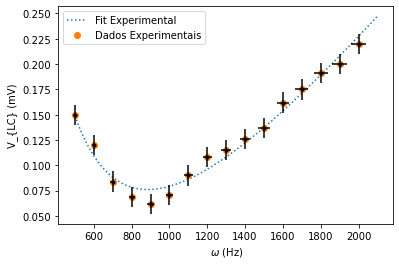

In [5]:
from scipy.optimize import curve_fit
def fit(x,A,B,D):
    return  A+B*x+D/x

popt, pcov = curve_fit(fit, F, V_CL) #colocar o que será fit primeiro x e dps y
std = np.sqrt(np.diag(pcov)) #erro do fit

from sklearn.metrics import r2_score
y_pred = fit(F, *popt)
R2 =r2_score(V_CL, y_pred) # R^2

x = np.linspace(500,2100,2000)
plt.plot(x,fit(x,popt[0],popt[1],popt[2]),':',label=f'Fit Experimental')
plt.plot(F, V_CL,'o',label='Dados Experimentais')
plt.errorbar(F,V_CL,yerr=eV_CL,xerr=F*0.02,fmt='.k')
print(f'Na equação que tinhamos B = {round(popt[1],5)}({int(round(std[1]*100000,0))}) V /(A Hz)')
print(f'Na equação que tinhamos A = {round(popt[2],-1)}({int(round(std[2],-1))}) V F Hz/A')


plt.xlabel(r' $\omega$ (Hz)')
plt.ylabel(r'V_{LC} (mV)')
plt.legend()
plt.show()

In [6]:
f_0 = (popt[2]/popt[1])**(1/2)
ef_0 = np.sqrt(((1/2)* popt[2]**(-1/2)*std[2]/(popt[1]**(1/2)) )**2 + ( (1/2)*popt[2]**(1/2)*std[1]/(popt[1]**(3/4)))**2)

print(f'Frequência calculada é {round(f_0,-1)} ({round(ef_0,-1)}) Hz')

print(f'Frequência esperada é {round(w/(2*np.pi),0)}({round((ew/(2*np.pi)),-1)}) Hz')

Frequência calculada é 890.0 (30.0) Hz
Frequência esperada é 830.0(70.0) Hz
